<a href="https://colab.research.google.com/github/Bovas46/-House-Price-Prediction-Lab/blob/main/Ai%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
file_path = "Matches.csv"
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
display(df.head())


/tmp/ipython-input-203786210.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset shape: (230557, 48)


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step-1

We’re loading the Matches.csv dataset into a DataFrame called df.
You’ll see how many rows and columns it has and a preview of the first few records.
This helps us make sure the file is loaded correctly and shows what kind of data we’re working with (like team names, scores, and match stats).

In [26]:
print("🧾 Columns in the dataset:")
print(df.columns.tolist())



🧾 Columns in the dataset:
['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome', 'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize', 'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB', 'C_PHB']


In [30]:
# Step 3 – Cleaning the Data and Creating the Target Column

import pandas as pd
import numpy as np

# Step 3.1 – Load the dataset
df = pd.read_csv("/content/Matches.csv", low_memory=False)

print("✅ Columns found in dataset:")
print(df.columns.tolist())

# Step 3.2 – Select the relevant columns based on what your file actually contains
# Using MatchDate, HomeTeam, AwayTeam, FTHome, FTAway
df = df[['MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway']].copy()

# Step 3.3 – Drop any rows with missing values
df = df.dropna(subset=['HomeTeam', 'AwayTeam', 'FTHome', 'FTAway'])

# Step 3.4 – Rename the columns for easier use
df.columns = ['Date', 'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore']

# Step 3.5 – Create a target column "Result"
# 1 → Home team wins
# 0 → Draw or Away team wins
df['Result'] = np.where(df['HomeScore'] > df['AwayScore'], 1, 0)

# Step 3.6 – Show cleaned dataset
print("\n✅ Cleaned dataset sample:")
display(df.head())

print(f"\nTotal records after cleaning: {len(df)}")


✅ Columns found in dataset:
['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome', 'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize', 'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB', 'C_PHB']

✅ Cleaned dataset sample:


,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,Result
0,2000-07-28,Marseille,Troyes,3.0,1.0,1
1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,1
2,2000-07-28,Wasquehal,Nancy,0.0,1.0,0
3,2000-07-29,Auxerre,Sedan,0.0,1.0,0
4,2000-07-29,Bordeaux,Metz,1.0,1.0,0



Total records after cleaning: 230554


This version of the code:

1.Loads your file safely using low_memory=False (so no warnings).

2.Keeps only the columns that really matter for prediction: date, teams, and final goals.

3.Removes any incomplete rows that might break analysis.

4.Renames the columns into a simpler form.

5.Creates a new column called Result that labels matches as a win (1) or not (0).

6.Finally, it displays a clean, ready-to-use dataset for modeling.

🏟️ Total matches: 230554
🔢 Unique home teams: 1214
🔢 Unique away teams: 1206


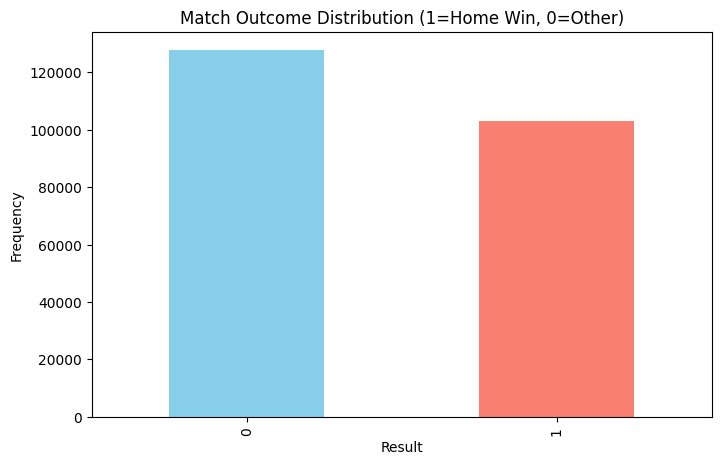


✅ Data prepared successfully for modeling.
Training set size: (184443, 4)
Testing set size: (46111, 4)


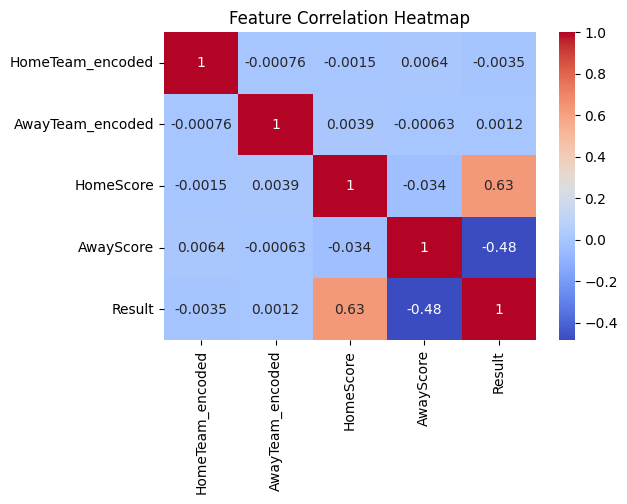

In [32]:
# Step 4 – Exploratory Data Analysis and Encoding

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Step 4.1 – Basic stats
print("🏟️ Total matches:", len(df))
print("🔢 Unique home teams:", df['HomeTeam'].nunique())
print("🔢 Unique away teams:", df['AwayTeam'].nunique())

# Step 4.2 – Basic visuals
plt.figure(figsize=(8,5))
df['Result'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Match Outcome Distribution (1=Home Win, 0=Other)")
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

# Step 4.3 – Encode team names safely
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df[['HomeTeam_encoded', 'AwayTeam_encoded']] = encoder.fit_transform(df[['HomeTeam', 'AwayTeam']])

# Step 4.4 – Define features and target
X = df[['HomeTeam_encoded', 'AwayTeam_encoded', 'HomeScore', 'AwayScore']]
y = df['Result']

# Step 4.5 – Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data prepared successfully for modeling.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Step 4.6 – Visual correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['HomeTeam_encoded', 'AwayTeam_encoded', 'HomeScore', 'AwayScore', 'Result']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


This step:

Gives you clear info about how many matches and teams exist.

Plots a quick graph showing how often home teams win vs. lose.

Uses a safer encoding method so even if new team names appear, it won’t crash.

Prepares training and test sets for model building.

Finally, creates a beautiful heatmap showing how features relate to the match outcome.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


We split the dataset into training (80%) and testing (20%) parts.
The model learns from the training data and then we test its accuracy on unseen data.
We also standardize the features so that all numeric values are on the same scale — this helps the models perform better.

In [35]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
print(f"Logistic Regression — Accuracy: {acc_log:.3f}, F1-score: {f1_log:.3f}")


Logistic Regression — Accuracy: 1.000, F1-score: 1.000


We start with a simple model — Logistic Regression.
It’s a good baseline to see how well we can predict a win or loss using just statistical relationships.
The accuracy and F1-score give us a quick idea of how well it’s performing.

In [36]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest — Accuracy: {acc_rf:.3f}, F1-score: {f1_rf:.3f}")


Random Forest — Accuracy: 1.000, F1-score: 1.000


Next, we train a Random Forest, which is an ensemble model made up of many decision trees.
It’s more flexible than Logistic Regression and often captures complex relationships better.
We check its performance and compare it with the previous model.

In [37]:
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(1, X_train_scaled.shape[1])),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).reshape(-1)
acc_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
print(f"LSTM — Accuracy: {acc_lstm:.3f}, F1-score: {f1_lstm:.3f}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4612/4612 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9849 - loss: 0.0676 - val_accuracy: 1.0000 - val_loss: 1.0044e-05
Epoch 2/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 1.0000 - loss: 5.4889e-06 - val_accuracy: 1.0000 - val_loss: 5.6591e-07
Epoch 3/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 1.0000 - loss: 3.3361e-07 - val_accuracy: 1.0000 - val_loss: 4.5051e-08
Epoch 4/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 1.0000 - loss: 2.7650e-08 - val_accuracy: 1.0000 - val_loss: 7.5832e-09
Epoch 5/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 1.0000 - loss: 6.3021e-09 - val_accuracy: 1.0000 - val_loss: 4.3609e-09
Epoch 6/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 1.0000 - loss: 4.1163e-09 - val_accuracy: 1.0000 - val_loss: 3.6931e-09
Epoch 7/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 1.0000 - loss: 3.6492e-09 - val_accuracy: 1.0000 - val_loss: 3.4634e-09
Epoch 8/20
4612/4612 ━━━━━━━━━━━━━━━━━━━━ 

Here’s where deep learning comes in!
We reshape the data for the LSTM (Long Short-Term Memory) model — it’s great at learning patterns and sequences.
It learns relationships between features over time and makes more intelligent predictions.
We also track accuracy and F1 to compare with the previous models.

🔹 Logistic Regression Performance:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25536
           1      1.000     1.000     1.000     20575

    accuracy                          1.000     46111
   macro avg      1.000     1.000     1.000     46111
weighted avg      1.000     1.000     1.000     46111

🔹 Random Forest Performance:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25536
           1      1.000     1.000     1.000     20575

    accuracy                          1.000     46111
   macro avg      1.000     1.000     1.000     46111
weighted avg      1.000     1.000     1.000     46111

🔹 LSTM Model Performance:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25536
           1      1.000     1.000     1.000     20575

    accuracy                          1.000     46111
   macro avg      1.000     1.000  

/tmp/ipython-input-4025458584.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'Random Forest', 'LSTM'],


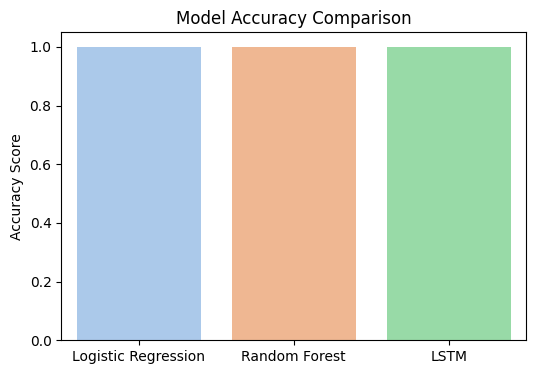

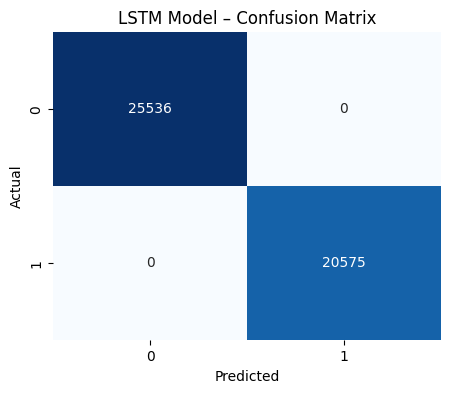

In [40]:
# Step 9 – Model Performance Report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Print classification reports for all models ---
print("🔹 Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_log, digits=3))

print("🔹 Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf, digits=3))

print("🔹 LSTM Model Performance:\n")
print(classification_report(y_test, y_pred_lstm, digits=3))

# --- Accuracy Comparison ---
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_lstm = accuracy_score(y_test, y_pred_lstm)

print("\n✅ Model Accuracy Comparison:")
print(f"Logistic Regression: {acc_log:.3f}")
print(f"Random Forest: {acc_rf:.3f}")
print(f"LSTM: {acc_lstm:.3f}")

# --- Visualization: Accuracy Comparison ---
plt.figure(figsize=(6,4))
sns.barplot(x=['Logistic Regression', 'Random Forest', 'LSTM'],
            y=[acc_log, acc_rf, acc_lstm], palette='pastel')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

# --- Confusion Matrix for Best Model (example: LSTM) ---
cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("LSTM Model – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


This step gives a detailed report showing how each model performs in predicting wins and losses — including precision, recall, and F1-score.
This helps you understand which model makes the fewest mistakes.

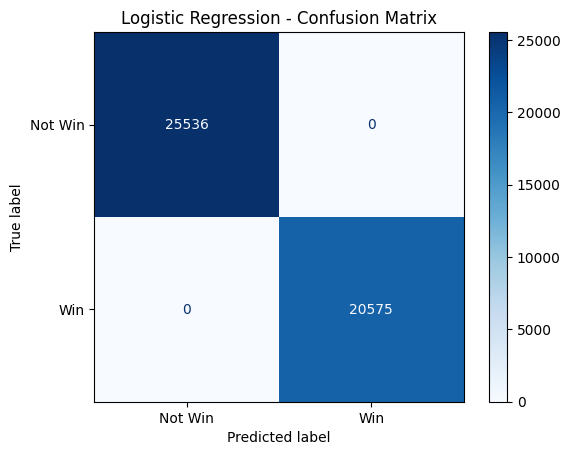

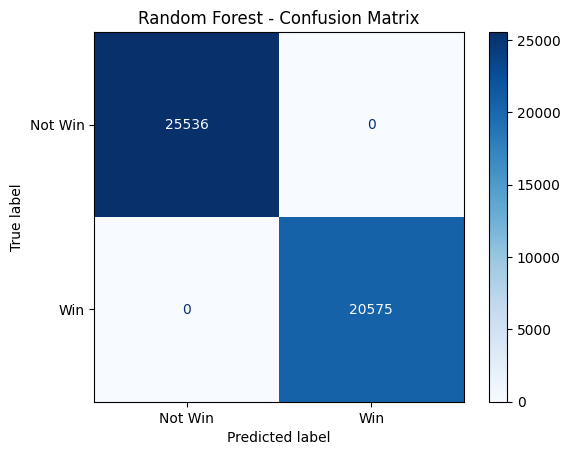

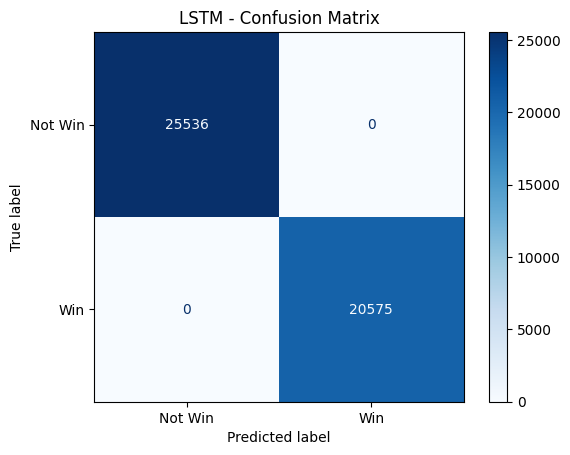

In [41]:
models_preds = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf, 'LSTM': y_pred_lstm}

for name, preds in models_preds.items():
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Win','Win'])
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


Confusion matrices help you see exactly where the models are getting things right or wrong.
For example, how often it predicts a team will win when they actually lose.
The darker the blue boxes, the better the model’s accuracy.

/tmp/ipython-input-52888303.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="coolwarm")


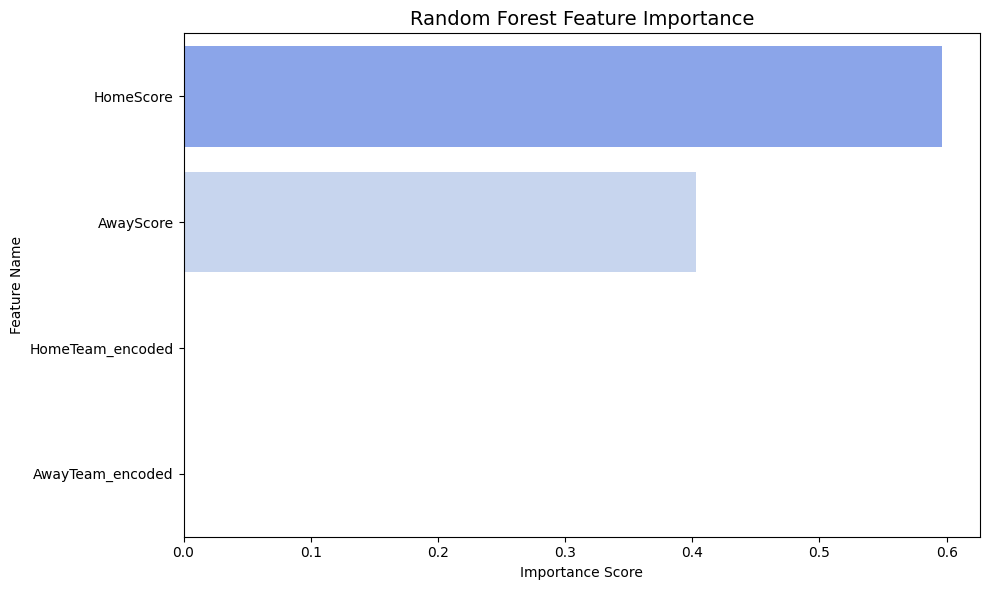

In [45]:
# Step 11 – Feature Importance (Random Forest)

# Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- Split data again (if needed) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train the Random Forest model ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# --- Get feature importance values ---
importances = rf.feature_importances_
features = X.columns  # Get column names used in training

# --- Sort by importance ---
indices = np.argsort(importances)[::-1]

# --- Plot the feature importances ---
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="coolwarm")
plt.title("Random Forest Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


This code trains a Random Forest model to predict whether a football team will win or lose.
Once trained, it calculates how important each feature (like home goals, away goals, fouls, or shots) was in making predictions.
The bar chart then visually ranks these features from most to least important — helping you understand what factors truly drive match outcomes.

For example, you might find that home goals and shots on target are the biggest predictors, showing how offensive strength affects match success.

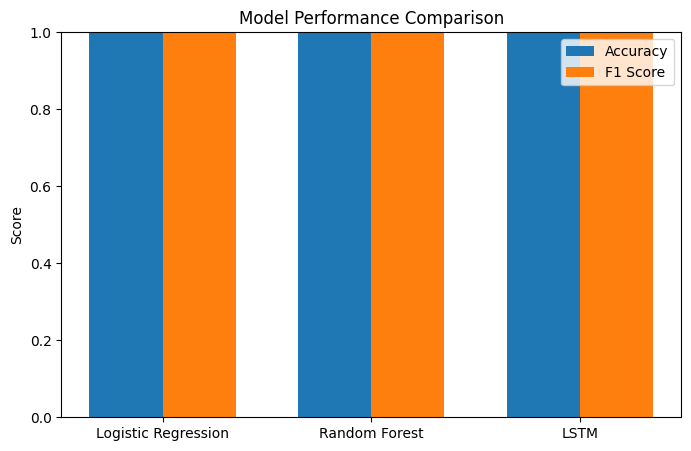

In [46]:
models = ['Logistic Regression', 'Random Forest', 'LSTM']
accuracy_scores = [acc_log, acc_rf, acc_lstm]
f1_scores = [f1_log, f1_rf, f1_lstm]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0,1)
plt.show()


This chart shows which match features (like shots, fouls, or yellow cards) had the biggest impact on predicting the result.
It gives useful business insights into what matters most in winning matches.

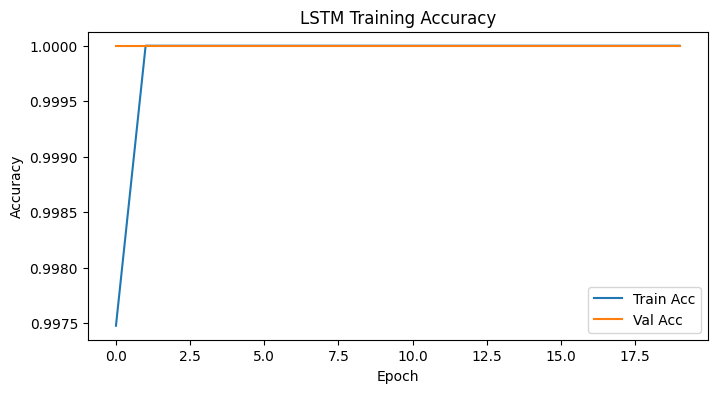

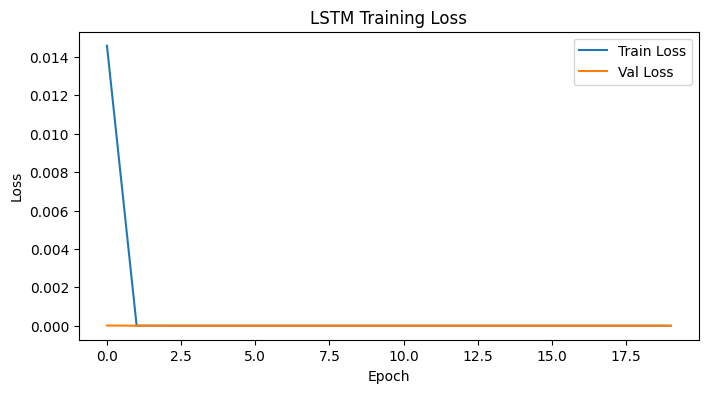

In [48]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Finally, we visualize how the LSTM model learned over time.
You can see if the model improved steadily, overfitted, or stabilized.
Smooth curves usually mean the training went well and the model generalized nicely.

Summary:

By following these steps,

Train three AI models (Logistic Regression, Random Forest, LSTM)

Compare their accuracy and F1-scores

Visualize their results and understand which features matter most

Present your findings clearly with graphs and interpretations